# Price Optimisation based on price elasticity of Demand

Pricing a product is a crucial aspect in any business. Alot of thought process is out into it. There are different strategies to price different kinds of products. There are products whose sales are quite sensitive to their prices and as such a small change in their price can lead to noticeable change in their sales. While there are products whose sales are not much affected by their price - these tend to be either luxury items or necessities (like certain medicines). This notebook will focus on the former type of products.

Price elasticity of demand (Epd), or elasticity, is the degree to which the effective desire for something changes as its price changes. In general, people desire things less as those things become more expensive. However, for some products, the customer's desire could drop sharply even with a little price increase, and for other products, it could stay almost the same even with a big price increase. Economists use the term elasticity to denote this sensitivity to price increases. More precisely, price elasticity gives the percentage change in quantity demanded when there is a one percent increase in price, holding everything else constant.

Mathematically speaking, the price elasticity of demand is defined to be the percentage change in quantity demanded, q,divided by the percentage change in price, p. The formula for the price elasticity (ǫ) is: $$e = \%ΔQ/ \%ΔP$$


In this work, we shall look at the sales of the items of a cafe. This cafe sells burgers, coke, lemonade and coffee. As a data scientist, it is our task to figure out the optimal prices to set for these items. If the price is set too high, the sales will drop & the price is set to low, then the margins will decrease. What is the sweet spot that will give us the maximum profit?

In [1]:
# Import the reqiured libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [2]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the data

In [6]:
sold = pd.read_csv('C:/Users/ADMIN/Desktop/Data Science/Cafe - Sell Meta Data.csv')
transactions = pd.read_csv('C:/Users/ADMIN/Desktop/Data Science/Cafe - Transaction - Store.csv')
date_info = pd.read_csv('C:/Users/ADMIN/Desktop/Data Science/Cafe - DateInfo.csv')

In [7]:
sold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SELL_ID        11 non-null     int64 
 1   SELL_CATEGORY  11 non-null     int64 
 2   ITEM_ID        11 non-null     int64 
 3   ITEM_NAME      11 non-null     object
dtypes: int64(3), object(1)
memory usage: 480.0+ bytes


In [43]:
sold

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER
5,2051,2,5030,COKE
6,2052,2,7821,BURGER
7,2052,2,6249,LEMONADE
8,2053,2,7821,BURGER
9,2053,2,5030,COKE


In [9]:
sold.describe()
sold.describe(include = ['O']) 
# INCLUDE = ['O'] includes categorical columns

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [10]:
sold[sold.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


SELL_ID: a categorical variable, identifier of the combination of items that is contained in the product.

SELL_CATEGORY: “0” identifies single products; the category “2” identifies the combo ones.

ITEM_ID: a categorical variable, identifier of the item that is contained in the product.

ITEM_NAME: a categorical variable, identifying the name of the item

In [12]:
transactions.head()
transactions.shape

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


(5404, 5)

In [47]:
transactions.describe()
transactions.describe(include = ['O'])

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [48]:
transactions[transactions.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


Important: It’s supposed the PRICE for that product in that day will not vary.

In details:
CALENDAR_DATE: a date/time variable, having the time always set to 00:00 AM.

PRICE: a numeric variable, associated with the price of the product identified by the SELL_ID.

QUANTITY: a numeric variable, associated with the quantity of the product sold, identified by the SELL_ID.

SELL_ID: a categorical variable, identifier of the product sold.

SELL_CATEGORY: a categorical variable, category of the product sold.

(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

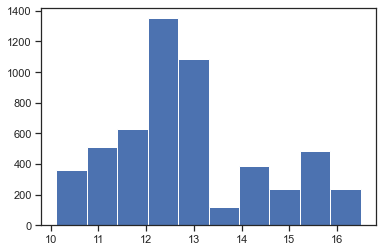

In [49]:
plt.hist(transactions.PRICE)

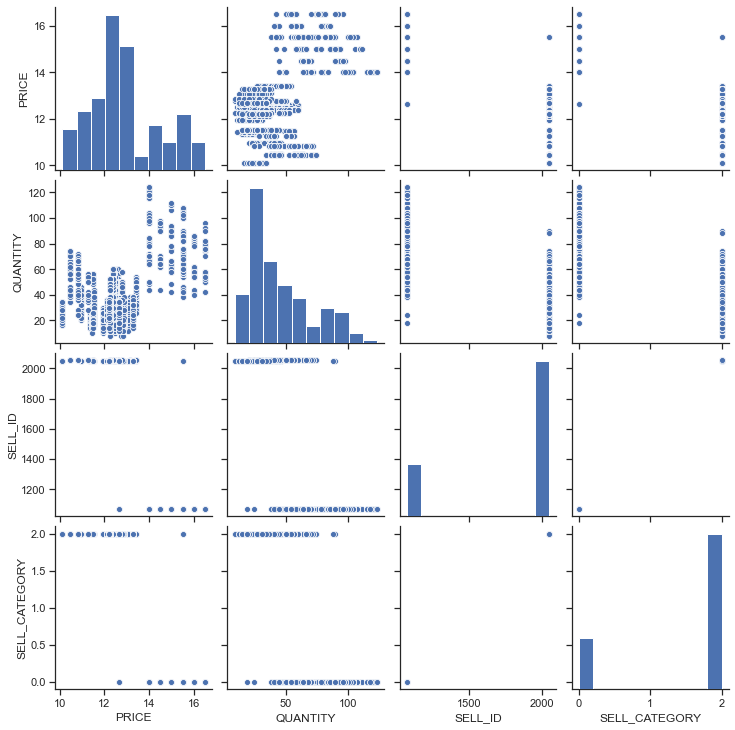

In [50]:
sns.pairplot(transactions)

In [51]:
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [52]:
date_info.describe()
date_info.describe(include = ['O'])

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [53]:
date_info.dtypes

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

In [54]:
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0
5,1/6/12,2012,NaN,0,0,23.0,0
6,1/7/12,2012,NaN,1,0,26.6,0
7,1/8/12,2012,NaN,1,0,26.6,0
8,1/9/12,2012,NaN,0,0,23.0,0
9,1/10/12,2012,NaN,0,0,24.8,0
10,1/11/12,2012,NaN,0,0,21.2,0
11,1/12/12,2012,NaN,0,0,24.8,0
12,1/13/12,2012,NaN,0,0,26.6,0


In [55]:
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday")

In [56]:
date_info

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,No Holiday,0,0,32.0,1
4,1/5/12,2012,No Holiday,0,0,24.8,0
5,1/6/12,2012,No Holiday,0,0,23.0,0
6,1/7/12,2012,No Holiday,1,0,26.6,0
7,1/8/12,2012,No Holiday,1,0,26.6,0
8,1/9/12,2012,No Holiday,0,0,23.0,0
9,1/10/12,2012,No Holiday,0,0,24.8,0


# Understanding the data better

In [57]:
np.unique(date_info['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [58]:
date_info['CALENDAR_DATE'].min()

'1/1/12'

In [59]:
date_info['CALENDAR_DATE'].max()

'9/9/15'

In [60]:
date_info.shape

(1349, 7)

In [61]:
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [ ]:
# ------------------------------------------------------------------------------------------------------

In [62]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,3055,0,1,0,0
2,3067,0,0,1,0
3,3028,0,0,0,1
4,2051,1,0,0,0
5,2051,0,0,1,0
6,2052,1,0,0,0
7,2052,0,0,0,1
8,2053,1,0,0,0
9,2053,0,0,1,0


In [63]:

pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


In [64]:
data1 = pd.merge(sold.drop(['ITEM_ID'],axis=1), transactions.drop(['SELL_CATEGORY'], axis= 1), on =  'SELL_ID')
data1.head(20)
b = data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE','PRICE']).QUANTITY.sum()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/02/12,15.5,70
2,1070,0,BURGER,01/03/12,15.5,62
3,1070,0,BURGER,01/04/12,15.5,88
4,1070,0,BURGER,01/05/12,15.5,104
5,1070,0,BURGER,01/06/12,15.5,100
6,1070,0,BURGER,01/07/12,15.5,70
7,1070,0,BURGER,01/08/12,15.5,70
8,1070,0,BURGER,01/09/12,15.5,106
9,1070,0,BURGER,01/10/12,15.5,108


In [65]:
b

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01/01/12       15.50     46
                                   01/01/13       15.50     60
                                   01/01/14       15.50     72
                                   01/01/15       14.00     66
                                   01/02/12       15.50     70
                                   01/02/13       15.50     68
                                   01/02/14       15.50     76
                                   01/02/15       14.00    102
                                   01/03/12       15.50     62
                                   01/03/13       15.50     70
                                   01/03/14       15.50     68
                                   01/03/15       14.00     68
                                   01/04/12       15.50     88
                                   01/04/13       15.50    100
                                   01/04/14       15.50     74

In [66]:
data1.shape
intermediate_data = b.reset_index()

(10808, 6)

In [67]:
data1.shape

(10808, 6)

In [68]:
b.shape

(10792,)

In [70]:
intermediate_data.head(20)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/01/13,15.5,60
2,1070,0,BURGER,01/01/14,15.5,72
3,1070,0,BURGER,01/01/15,14.0,66
4,1070,0,BURGER,01/02/12,15.5,70
5,1070,0,BURGER,01/02/13,15.5,68
6,1070,0,BURGER,01/02/14,15.5,76
7,1070,0,BURGER,01/02/15,14.0,102
8,1070,0,BURGER,01/03/12,15.5,62
9,1070,0,BURGER,01/03/13,15.5,70


In [71]:
intermediate_data['CALENDAR_DATE'].min()

'01/01/12'

In [72]:
intermediate_data['CALENDAR_DATE'].max()

'9/30/14'

In [73]:
combined_data = pd.merge(intermediate_data, date_info, on = 'CALENDAR_DATE')
combined_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [74]:
combined_data.shape

(6696, 12)

In [75]:
combined_data[combined_data.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [76]:
np.unique(combined_data['HOLIDAY'])
np.unique(combined_data['IS_WEEKEND'])
np.unique(combined_data['IS_SCHOOLBREAK'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'No Holiday'], dtype=object)

array([0, 1])

array([0, 1])

In [77]:
bau_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0)]

In [78]:
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [79]:
bau_data.shape

(3768, 12)

In [80]:
np.unique(bau_data['HOLIDAY'])
np.unique(bau_data['IS_WEEKEND'])
np.unique(bau_data['IS_SCHOOLBREAK'])

array(['No Holiday'], dtype=object)

array([0])

array([0])

(array([1884.,    0.,    0.,  942.,    0.,    0.,  471.,    0.,    0.,
         471.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

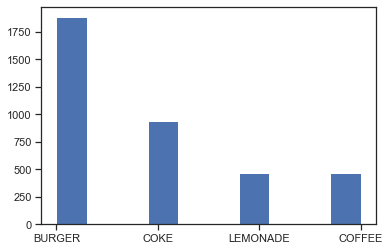

In [81]:
# Data exploration
plt.hist(bau_data.ITEM_NAME)

(array([ 411.,  388.,  441., 1159.,  790.,  108.,  122.,  111.,  174.,
          64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <a list of 10 Patch objects>)

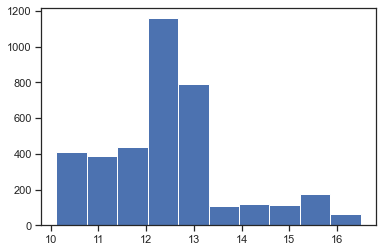

In [82]:
plt.hist(bau_data.PRICE)

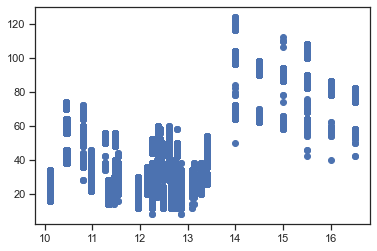

In [83]:
plt.scatter(combined_data['PRICE'], combined_data['QUANTITY'])

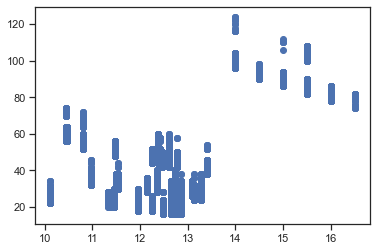

In [84]:
plt.scatter(bau_data['PRICE'], bau_data['QUANTITY'])

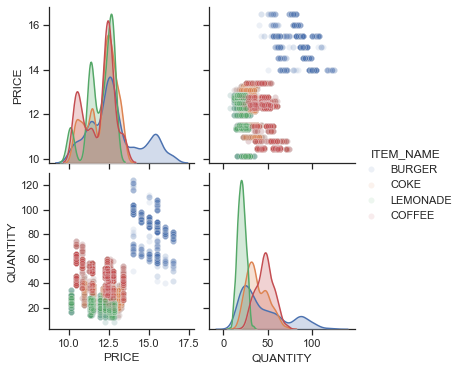

In [85]:
sns.pairplot(combined_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

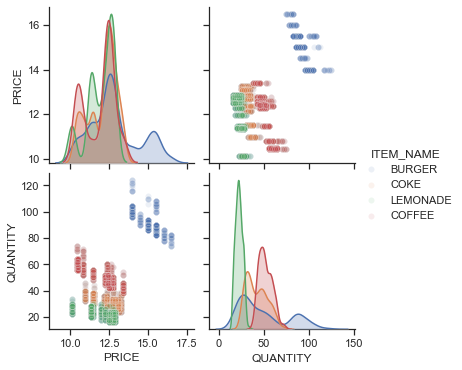

In [86]:
sns.pairplot(bau_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

The price density plot is bimodal. From the graph we can see that for all quantities, as the price is increased the quantity sold is decreased. Although coke is hidden in this view. We xan go ahead and calculate the price elasticities for this.

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
5,2053,2,BURGER,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
8,1070,0,BURGER,1/13/13,15.50,70,2013,No Holiday,1,0,30.2,0


(3348, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000
mean,1806.500000,1.500000,12.858572,44.974313,2013.351254,0.284349,0.200717,56.255914,0.878136
std,425.282579,0.866155,1.565046,25.747886,1.062567,0.451171,0.400596,19.996348,0.327177
min,1070.000000,0.000000,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,24.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.500000,2.000000,12.640000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2052.250000,2.000000,13.557500,60.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.000000,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


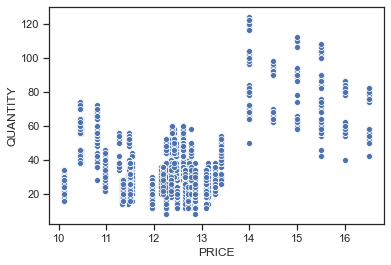

In [87]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

From the above scatter plot it is clearly visible that there must be different types of burgers being sold. Now let's see the same distributin whenwe differentiate with SELL_ID which indicates if the burger was a part of the combo and hence, must be treated separately.

In [91]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
print(burger)
print(burger.describe())


           SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YEAR  \
count  3348.000000    3348.000000  3348.000000  3348.000000  3348.000000   
mean   1806.500000       1.500000    12.858572    44.974313  2013.351254   
std     425.282579       0.866155     1.565046    25.747886     1.062567   
min    1070.000000       0.000000    10.120000     8.000000  2012.000000   
25%    1805.750000       1.500000    11.530000    24.000000  2012.000000   
50%    2051.500000       2.000000    12.640000    36.000000  2013.000000   
75%    2052.250000       2.000000    13.557500    60.000000  2014.000000   
max    2053.000000       2.000000    16.500000   124.000000  2015.000000   

        IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE   IS_OUTDOOR  
count  3348.000000     3348.000000          3348.000000  3348.000000  
mean      0.284349        0.200717            56.255914     0.878136  
std       0.451171        0.400596            19.996348     0.327177  
min       0.000000        0.000

In [92]:
np.unique(combined_data.SELL_ID)

array([1070, 2051, 2052, 2053])

In [93]:
np.unique(combined_data.SELL_CATEGORY)

array([0, 2])

In [94]:
burger_1070 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 1070)]

burger_1070.head()
burger_1070.describe()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
8,1070,0,BURGER,1/13/13,15.5,70,2013,No Holiday,1,0,30.2,0
16,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
24,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
32,1070,0,BURGER,1/14/12,15.5,74,2012,No Holiday,1,0,23.0,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,1070.0,0.0,15.154719,82.685783,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.744770,15.981238,1.063043,0.451373,0.400776,20.005316,0.327324
min,1070.0,0.0,14.000000,40.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1070.0,0.0,14.500000,68.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,1070.0,0.0,15.500000,86.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,1070.0,0.0,15.500000,92.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,1070.0,0.0,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


# Modeling

In [95]:
# This is for the combined data
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.45e-32
Time:                        07:47:24   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.0

<Figure size 864x576 with 0 Axes>

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
5,2053,2,BURGER,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
16,1070,0,BURGER,1/13/14,15.50,104,2014,No Holiday,0,0,28.4,0


(1884, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.0,1884.0,1884.000000,1884.000000
mean,1806.500000,1.500000,12.830340,49.562633,2013.186837,0.0,0.0,53.691720,0.883227
std,425.331956,0.866255,1.567257,27.309516,1.058620,0.0,0.0,18.721922,0.321235
min,1070.000000,0.000000,10.120000,16.000000,2012.000000,0.0,0.0,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,28.000000,2012.000000,0.0,0.0,35.600000,1.000000
50%,2051.500000,2.000000,12.640000,40.000000,2013.000000,0.0,0.0,53.600000,1.000000
75%,2052.250000,2.000000,13.557500,74.000000,2014.000000,0.0,0.0,71.600000,1.000000
max,2053.000000,2.000000,16.500000,124.000000,2015.000000,0.0,0.0,87.800000,1.000000


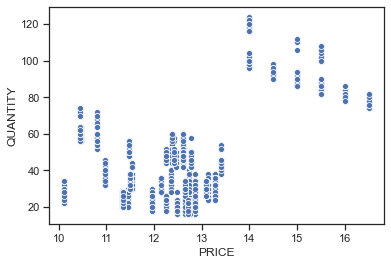

In [98]:
burger = bau_data[bau_data['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

As you can see, the scatter plot is much cleaner. Although there does seem to be 2 separate trends

In [100]:
burger_1070 = bau_data[(bau_data['ITEM_NAME'] == 'BURGER')&(bau_data['SELL_ID'] == 1070)]
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))


                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           7.16e-70
Time:                        07:52:49   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.7193      6.702     34.726      0.0

<Figure size 864x576 with 0 Axes>

Let's look at the bau data again to see if there is anything els ein the data we can use to further refine our model.

In [101]:
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [102]:
bau2_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0) & (combined_data['IS_OUTDOOR']==1)]

In [104]:
burger_1070 = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] == 1070)]

burger_1070.head()
burger_1070.describe()


,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
48,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
88,1070,0,BURGER,1/15/15,14.0,104,2015,No Holiday,0,0,32.0,1
120,1070,0,BURGER,1/16/15,14.0,100,2015,No Holiday,0,0,32.0,1
448,1070,0,BURGER,1/27/12,15.5,86,2012,No Holiday,0,0,32.0,1
576,1070,0,BURGER,1/31/12,15.5,84,2012,No Holiday,0,0,32.0,1


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,416.0,416.0,416.000000,416.000000,416.000000,416.0,416.0,416.000000,416.0
mean,1070.0,0.0,15.139423,89.274038,2013.201923,0.0,0.0,57.282212,1.0
std,0.0,0.0,0.709511,6.811889,1.076628,0.0,0.0,16.890613,0.0
min,1070.0,0.0,14.000000,74.000000,2012.000000,0.0,0.0,26.600000,1.0
25%,1070.0,0.0,14.500000,84.000000,2012.000000,0.0,0.0,41.000000,1.0
50%,1070.0,0.0,15.000000,88.000000,2013.000000,0.0,0.0,59.000000,1.0
75%,1070.0,0.0,15.500000,94.000000,2014.000000,0.0,0.0,71.600000,1.0
max,1070.0,0.0,16.500000,104.000000,2015.000000,0.0,0.0,87.800000,1.0


                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          5.51e-153
Time:                        07:53:19   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

<Figure size 864x576 with 0 Axes>

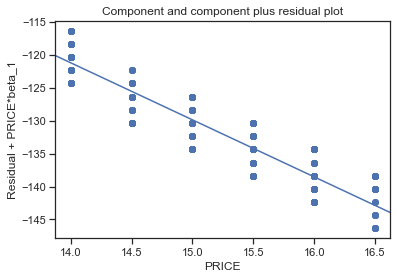

In [105]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(burger_model, "PRICE")

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
9,2051,2,BURGER,1/13/13,13.13,26,2013,No Holiday,1,0,30.2,0
17,2051,2,BURGER,1/13/14,13.27,38,2014,No Holiday,0,0,28.4,0
25,2051,2,BURGER,1/13/15,11.53,38,2015,No Holiday,0,0,28.4,0
33,2051,2,BURGER,1/14/12,12.73,24,2012,No Holiday,1,0,23.0,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2051.0,2.0,12.368017,29.498208,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.726329,5.782878,1.063043,0.451373,0.400776,20.005316,0.327324
min,2051.0,2.0,10.970000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.0,2.0,11.530000,26.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.0,2.0,12.660000,30.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2051.0,2.0,13.080000,34.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2051.0,2.0,13.270000,46.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


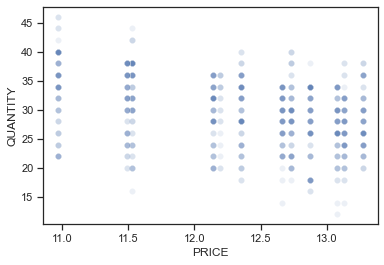

In [106]:
burger_2051 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 2051)]

burger_2051.head()
burger_2051.describe()
sns.scatterplot(data = burger_2051, x = burger_2051.PRICE, y = burger_2051.QUANTITY, alpha = 0.1)

In [107]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_2051).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))


                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     124.7
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           4.45e-27
Time:                        07:55:16   Log-Likelihood:                -2597.8
No. Observations:                 837   AIC:                             5200.
Df Residuals:                     835   BIC:                             5209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.9906      3.184     20.411      0.0

<Figure size 864x576 with 0 Axes>

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
7,2053,2,COKE,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
10,2051,2,COKE,1/13/13,13.13,26,2013,No Holiday,1,0,30.2,0
15,2053,2,COKE,1/13/13,13.41,32,2013,No Holiday,1,0,30.2,0
18,2051,2,COKE,1/13/14,13.27,38,2014,No Holiday,0,0,28.4,0


(1674, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1674.000000,1674.0,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,2052.000000,2.0,12.151326,38.150538,2013.351254,0.284349,0.200717,56.255914,0.878136
std,1.000299,0.0,0.871405,11.861375,1.062726,0.451239,0.400656,19.999336,0.327226
min,2051.000000,2.0,10.450000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.000000,2.0,11.490000,30.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.000000,2.0,12.370000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2053.000000,2.0,12.770000,48.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.0,13.410000,74.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


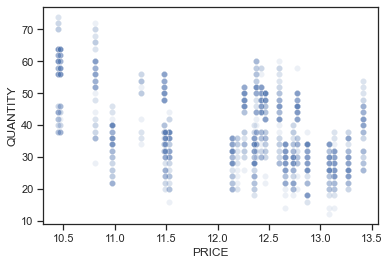

In [108]:
coke = combined_data[combined_data['ITEM_NAME'] == 'COKE']
coke.head()
coke.shape
coke.describe()
sns.scatterplot(x = coke.PRICE, y = coke.QUANTITY , alpha = 0.1)

In [110]:
coke_model = ols("QUANTITY ~ PRICE", data=coke).fit()
print(coke_model.summary())



                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          1.94e-104
Time:                        07:55:44   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1140      3.522     34.100      0.0

In [111]:
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit()
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary())
    return price_elasticity, model

In [113]:
price_elasticity, model_burger_1070 = create_model_and_find_elasticity(burger_1070)


Price elasticity of the product: -8.658581488470567
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          5.51e-153
Time:                        07:57:28   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [114]:
burger2051_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2051)]
model_burger_2051 = create_model_and_find_elasticity(burger2051_data)

Price elasticity of the product: -3.618990615456309
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.34e-58
Time:                        07:58:00   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


# Find optimal price for maximum profit

Now, let's take coke (the sell_id was 2051 for the last coke data) and since we do not the buying price of coke, let''s assume it to be a little less than the minimum coke price in the dataset

In [116]:
burger_data = burger_1070

In [117]:
burger_data.PRICE.min()

14.0

In [118]:
burger_data.PRICE.max()

16.5

Let's take 9 as the buying price of coke. We now want to be able to set the price of coke to get the maximum profit. PRICE is the selling price

In [119]:
buying_price_burger = 10

In [120]:
start_price = 9
end_price = 20

In [121]:
test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])

In [122]:
test['PRICE'] = np.arange(start_price, end_price,0.01)

In [123]:
test['QUANTITY'] = burger_model.predict(test['PRICE'])

In [124]:
test

,PRICE,QUANTITY
0,9.00,39.163372
1,9.01,39.134676
2,9.02,39.105979
3,9.03,39.077282
4,9.04,39.048585
5,9.05,39.019888
6,9.06,38.991191
7,9.07,38.962494
8,9.08,38.933797
9,9.09,38.905100


In [125]:
test['PROFIT'] = (test["PRICE"] - buying_price_burger) * test["QUANTITY"]

In [126]:
test

,PRICE,QUANTITY,PROFIT
0,9.00,39.163372,-3.916337e+01
1,9.01,39.134676,-3.874333e+01
2,9.02,39.105979,-3.832386e+01
3,9.03,39.077282,-3.790496e+01
4,9.04,39.048585,-3.748664e+01
5,9.05,39.019888,-3.706889e+01
6,9.06,38.991191,-3.665172e+01
7,9.07,38.962494,-3.623512e+01
8,9.08,38.933797,-3.581909e+01
9,9.09,38.905100,-3.540364e+01


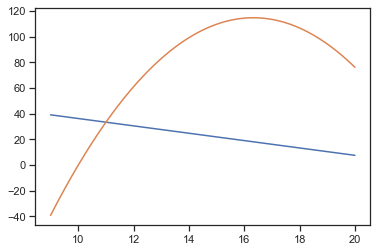

In [127]:
plt.plot(test['PRICE'],test['QUANTITY'])
plt.plot(test['PRICE'],test['PROFIT'])
plt.show()

Let's find the exact price at which maximum profit is gained:

In [128]:
ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]

In [129]:
test.loc[[ind]]

,PRICE,QUANTITY,PROFIT
732,16.32,18.15724,114.753758


In [130]:
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1
    end_price = data.PRICE.min() + 10
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
    test['PRICE'] = np.arange(start_price, end_price,0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    plt.plot(test['PRICE'],test['QUANTITY'])
    plt.plot(test['PRICE'],test['PROFIT'])
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]]
    return values_at_max_profit
    

# Conclusion

This is the price the cafe should set on it's item to earn maximum profit based on it's previous sales data. It is important to note that this is on a normal day. On 'other' days such as a holiday, or an event taking place have a different impact on customer buying behaviours and pattern. Usually an increase in consumption is seen on such days. These must be treated separately. Similarly, it is important to remove any external effects other than price that will affect the purchase behaviours of customers including the datapoints when the item was on discount.

Once, the new prices are put up, it is important to continuously monitor the sales and profit. If this method of pricing is a part of a rpoduct, a dashboard can be created for the purpose of monitoring these items and calculating the lift in the profit.